In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw2.ipynb")

# Hw 2: More Pandas and Data Exploration! 🐼

Name: Matthew DeSantis

Student ID: 488103

Collaborators:

## Instructions

For this homework, work through **Lab 2 (Analyzing the MoMA Data)** first. In general, you should feel free to import any package that we have previously used in class. Ensure that all plots have the necessary components that a plot should have (e.g. axes labels, a title, and a legend if it is applicable).

Frequently **save** your notebook!

### Collaborators and Sources
Furthermore, in addition to recording your **collaborators** at the top of this homework, please also remember to **cite/indicate all external sources** used when finishing this assignment. 
> This includes peers, TAs, and links to online sources. 

Note that these citations will be taken into account during the grading and regrading process. An example of citing a source in a code block:

In [ ]:
# collaborators and sources:
# Albert Einstein and Marie Curie
# https://developers.google.com/edu/python/strings

# your code here
answer = 'my answer'

### Submission instructions
* Submit this Python notebook, including your answers in the code cells as your homework submission.
* **Do not change the number of cells!** Your submission notebook should have exactly one code cell per problem. 
* Do **not** remove the `# your code here` line. Add your solution after that line.

### Some imports and configurations

In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [3]:
# Let's run some configurations to make prettier plots
from utility.util import configure_plots

configure_plots()

Plots configured! 📊


In [4]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## 1. More MoMA Data Visualizations

In `Lab2` you visulaized _categorical_ features in the MoMA data. Let's look into visualizing _continuous_ features.

Let's read the data first. 

[_ungraded_] **Do this!** Go to your Lab2 folder, run the Lab2 notebook. Using a the _terminal_ or a _file browser_ (yes, I mean the file browser of your operating sysyem, **not** the jupyter file hierarchy view in the browser window) copy the file `processed_artworks.pickle` from `lab2-XYZ/utility/data` to `hw2-ABC/utility/data`. Then run the cell below to load the data. 

**DO NOT EDIT THE FOLLOWING CELL, THE AUTOGRADER DEPENDS ON THIS PATH!**

In [5]:
artworks = pd.read_pickle("utility/data/processed_artworks.pickle")

<!-- BEGIN QUESTION -->

### Problem 1.1

Let's investiage the **size of the MoMA artworks**, specifically their **widths**.

**Write-up!** What type of variable is the _width of the artwork_ and which plot is best used to visualize this feature.  

_Width is a quantatative variable, best represented in a histogram. _

<!-- END QUESTION -->

### Problem 1.2

**Do this!** Compute and print the following summary statistics of the artwork width feature: _mean, standard deviation, range (min, max)_. 

> **Best practice**: When filtering NaN values (e.g., using `notnull()`) or removing outliers (see below) it's best practice to only perform these on the features you are currently looking at. Do **not** remove whole data entries from the dataframe.

*Note: this question has hidden tests, or is graded on style of code and not just answer alone.*

In [6]:
# Extract the width column
w = artworks['Width_cm']

# Do not consider examples where the value = NaN
id_NaN = artworks['Width_cm'].notnull()
w = w[id_NaN]


mean = w.mean()
standard_dev = w.std()
max_width = w.max()
min_width = w.min()

print(f'mean: {mean}')
print(f'standard deviation: {standard_dev}')
print(f'min: {min_width}')
print(f'max: {max_width}')

mean: 38.02759300863655
standard deviation: 66.68162504161408
min: 0.0
max: 9144.0


<!-- BEGIN QUESTION -->

### A Question to Investigate 

Something looks interesting here: What's up with artworks having a width of 9000cm (90 meters = 295 ft)? 

* **(Q1)** How many artworks have large widths, let's say a width of more than 8000cm? 


Let's approach this with a plot.

### Problem 1.3

**Do this!** Create an appropriate plot to visualize the frequency of artworks with respect to their width. Select an appropriate non-default _binwidth_.  
> **Reminder**: do not forget to include all necesary components in your plot: _title, axis labels, units_ (if applicable). This will hold for all plots you will create in this and future assignemnts. We will not add this reminder in the future. 

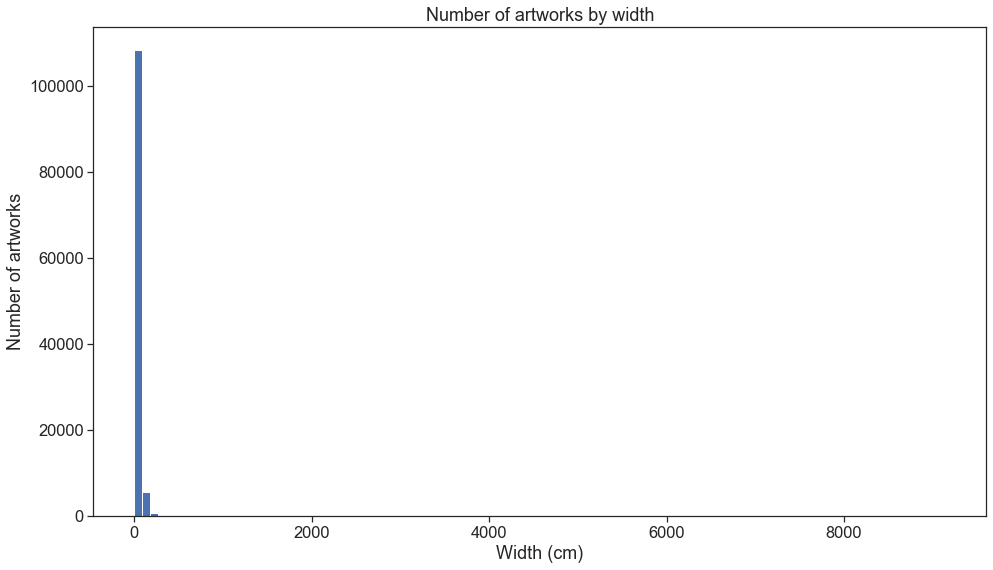

In [7]:
plt.hist(w, bins=100)
plt.title("Number of artworks by width")
plt.ylabel("Number of artworks")
plt.xlabel("Width (cm)")
plt.show()


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Write-up!** This write-up has two parts: 
* Describe your plot: What does it show? 
* Critically question your work: Is this a good visualization? Does it help in answering **(Q1)**?  Why/why not? 

_My plot shows the number of artworks that have certain widths. It's honestly pretty terrible due to the fact that the extremely uneven spread is throwing off the bin widths, resulting in the vast majority being in the same bin and throwing off the y axis._

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Problem 1.4

Let's change the scale of the plot.

**Do this!** By using an appropriate `?` command to retrieve the documentation of your plot function used above, find out how to create the same plot using a **log scale** (for the y axis). Create the plot leaving all other parameters the same as in your first plot. Assign it an appropriate title (that is differnt from the plot above). 

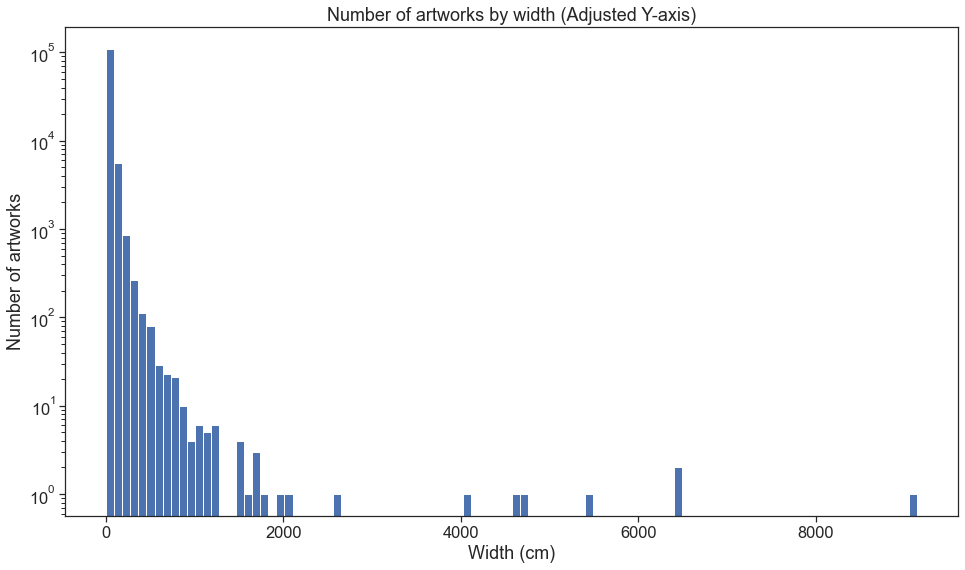

In [8]:
plt.hist(w, bins=100, log=True)
plt.title("Number of artworks by width (Adjusted Y-axis)")
plt.ylabel("Number of artworks")
plt.xlabel("Width (cm)")
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Write-up!** Answer **(Q1)**.
> **Hint**: You do not have to run any code to find this answer. Simply look at the plot above.

_Only 1._

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Problem 1.5

Instead of the plot suing the log-scale, we can also take another approach: we can remove the _outliers_.

**Do this!** Create a temporary variable `w_new` of the width of all artworks with width smaller than 250cm. Also, a width of 0 doesn't really make much sense either; remove artworks with width 0cm! Visualize the frequency of artworks with respect to their width not including these outliers.  


> **Hint**: Use **Boolean indexing** on `w`! This approach is required to receive full credit.

In [14]:
w_new = w[w<250]
w_new = w_new[w!=0]

<!-- END QUESTION -->

### Problem 1.6
Hold on!!! Now our summary statistics have changed. 

**Do this!** Compute the summary statistics from this new variable: _mean, standard deviation, and range (min, max)_. 

*Note: this question has hidden tests, or is graded on style of code and not just answer alone.*

In [15]:
new_mean = w_new.mean()
new_standard_dev = w_new.std()
new_max_width = w_new.max()
new_min_width = w_new.min()

print("New Data stats: ")
print(f'mean: {new_mean}')
print(f'standard deviation: {new_standard_dev}')
print(f'min: {new_min_width}')
print(f'max: {new_max_width}')

New Data stats: 
mean: 36.028536451716406
standard deviation: 30.412234771130922
min: 0.3
max: 249.873


<!-- BEGIN QUESTION -->

### Problem 1.7

**Write-up!** Which of the three approaches/data visualizations do you think is best? Briefly justify your choice by including one benefit of the approach you selected and one disadvantage of each of the two approaches you did not deem appropriate/best. 

 I think the chart with the adjusted y scale is the best, as it is both readable and provides a complete picture of the data. The chart without the adjusted y axis is not readable but has all the data, the outlier trimmed data is readable but does not include all the data, but the y axis adjusted chart is both readable and complete. 

<!-- END QUESTION -->

## Good to Know: Many Distributions have a _Long Tail_

In statistics and business, a _long tail_ of some distributions of numbers is the portion of the distribution having many occurrences far from the "head" or central part of the distribution. The distribution could involve popularities, random numbers of occurrences of events with various probabilities, etc. The term is often used loosely, with no definition or arbitrary definition, but precise definitions are possible. Read more on [Wikipedia](https://en.wikipedia.org/wiki/Long_tail)!

### Why does the long tail matter? 

Read this story on [WIRED](https://www.wired.com/2004/10/tail/).

## 2. World Happiness: Understanding the Data

It's time to explore another dataset. This time the data comes from _socioeconomics_ and attempts to decribe the state of global happiness. The dataset we will be using is from the [World Happiness Report from 2019](https://worldhappiness.report/ed/2019/).

<img src="utility/pics/WorldHappiness.png" alt="Drawing" style="width: 500px;"/>

In the following section, we will do some preliminary exploration. First, find the data download link in your repo's `README.md`. Store the `happiness.csv` data in `utility/data`. Then, let's load the data into `happiness`.

**DO NOT EDIT THE FOLLOWING CELL, THE AUTOGRADER DEPENDS ON THIS PATH!**

In [16]:
import os

data = 'utility/data'

assert os.path.exists(data), \
    'Unable to find data; make sure that you have the `utility` directory'

happiness = pd.read_csv(f'{data}/happiness.csv')

<!-- BEGIN QUESTION -->

### Problem 2.1

Let's get to know our data set.

**Do this!** Use the cell below to investigate the data set as you answer the following questions.

In [18]:
happiness

,Country,Score,Region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,7.769,Europe,1.340,1.587,0.986,0.596,0.153,0.393
1,Denmark,7.600,Europe,1.383,1.573,0.996,0.592,0.252,0.410
2,Norway,7.554,Europe,1.488,1.582,1.028,0.603,0.271,0.341
3,Iceland,7.494,Europe,1.380,1.624,1.026,0.591,0.354,0.118
4,Netherlands,7.488,Europe,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,Rwanda,3.334,Africa,0.359,0.711,0.614,0.555,0.217,0.411
152,Tanzania,3.231,Africa,0.476,0.885,0.499,0.417,0.276,0.147
153,Afghanistan,3.203,Asia & Pacific,0.350,0.517,0.361,0.000,0.158,0.025
154,Central African Republic,3.083,Africa,0.026,0.000,0.105,0.225,0.235,0.035


**Write-up!** How many **observations** are in our dataset? How many **features** does each one have?

_There are 156 observations, with 9 features each._

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Write-up!** What are the **features**? What **types of variables** (categorical, continuous, etc.) are each of them? How are they represented programmatically (i.e., which **data type** – string, float, etc. – do you use to represent each feature)?

_ Features: Country (Categorical/String) Score (Continuous/Float) Region (Categorical/String) GPD per capita (Continuous/Float) Social support (Continuous/Float) Healthy life expectancy (Continuous/Float) Freedom to make life choices (Continuous/Float) Generosity (Continuous/Float) Perceptions of corruption (Continuous/Float)        _

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Problem 2.2

**Write-up!** What does this data set seem to be about? If this data set was used to build a model, which feature could be the **target**? Give a brief **justification** for your selection of the target variable. Which would be the **inputs**? 

Here is the data set again.

In [19]:
happiness.head()

,Country,Score,Region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,7.769,Europe,1.340,1.587,0.986,0.596,0.153,0.393
1,Denmark,7.600,Europe,1.383,1.573,0.996,0.592,0.252,0.410
2,Norway,7.554,Europe,1.488,1.582,1.028,0.603,0.271,0.341
3,Iceland,7.494,Europe,1.380,1.624,1.026,0.591,0.354,0.118
4,Netherlands,7.488,Europe,1.396,1.522,0.999,0.557,0.322,0.298


_It's a ranking of countries based on an amalgination of various features they have. The score is the target, as that's what the countries are sorted by. Everything besides the country name and region would be an input._

<!-- END QUESTION -->

## 3. Exploring Individual Happiness Features

Next, let's take a look at the features individually.

### Problem 3.1

**Do this!** In the cell below, create an indexer that can be used to get the numerical columns of the `happiness` DataFrame and store it in `numerical`. For example, if we evaluated `happiness[numerical].head()`, we would get all columns with names in `numerical`.

*Note: this question has hidden tests, or is graded on style of code and not just answer alone.*

In [22]:
# hard-coded solution (totally acceptable)
numerical = ['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

# programmatic solution (a little fancier)


happiness[numerical].head()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,7.488,1.396,1.522,0.999,0.557,0.322,0.298


<!-- BEGIN QUESTION -->

### Problem 3.2

**Do this!** Use the cell below to investigate the data set as you answer the following questions.

In [24]:
happiness[numerical].mean()
happiness[numerical].std()

Score                           1.113120
GDP per capita                  0.398389
Social support                  0.299191
Healthy life expectancy         0.242124
Freedom to make life choices    0.143289
Generosity                      0.095254
Perceptions of corruption       0.094538
dtype: float64

**Write-up!** What are the average values for each numeric feature?

_Score                           5.407096
GDP per capita                  0.905147
Social support                  1.208814
Healthy life expectancy         0.725244
Freedom to make life choices    0.392571
Generosity                      0.184846
Perceptions of corruption       0.110603
_

<!-- END QUESTION -->

Recall, standard deviation is given by
$$\text{std}(x) = \sigma = \sqrt{\dfrac{\sum_{i=1}^n (x_i - \mu)^2}{n-1}}.$$

**Write-up!** Which feature has the largest standard deviation? Which one has the lowest?

> Note that this is just for practicing how to retrieve these values. Since the scales for each may be different, we cannot meaningfully compare each standard deviation value.

Score                           1.113120
GDP per capita                  0.398389
Social support                  0.299191
Healthy life expectancy         0.242124
Freedom to make life choices    0.143289
Generosity                      0.095254
Perceptions of corruption       0.094538


<!-- BEGIN QUESTION -->

### Problem 3.3

Let's implement a median finding function.

**Do this!** Complete the function below so that it returns the `median` of an array `x`. Be sure to NumPy indexing operations to do this, but do not use NumPy's built-in median function.

*Note: this question has hidden tests, or is graded on style of code and not just answer alone.*

In [147]:
def compute_median(x, axis=0):
    sortedx = np.sort(x, axis)
    number = sortedx.shape[0]
    
    odd = (int)(((number+1)/2)-1)
    even1 = (int)(number/2)
    even2 = (int)(even1-1)
    
    if (number%2 == 1):
        median = sortedx[odd]
    else:
        median = (sortedx[even1]+sortedx[even2])/2
    
    return median

In [149]:
grader.check("qcii")

qcii results: All test cases passed!

<!-- END QUESTION -->

Let's try using your implementation to compute the median values for each feature.

**Do this!** Use the [`apply`🔗](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html) method on DataFrames to compute the medians for each feature and store the result in `medians`.

*Note: this question has hidden tests, or is graded on style of code and not just answer alone.*

In [150]:
medians = compute_median(happiness[numerical])

medians

array([5.3795, 0.96  , 1.2715, 0.789 , 0.417 , 0.1775, 0.0855])

<!-- BEGIN QUESTION -->

### Problem 3.4

Let's create some visualizations.

**Do this!** In the cell below, create box plots for each numerical feature. You can use the `.values` property of DataFrames to get a NumPy array. Ensure that your plots have all of the necessary components.

> **[Optional]**: Try using a [`violin plot`🔗](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.violinplot.html?highlight=violinplot#matplotlib.pyplot.violinplot) to visualize each feature. You can use this function the same way as you would use `boxplot`.

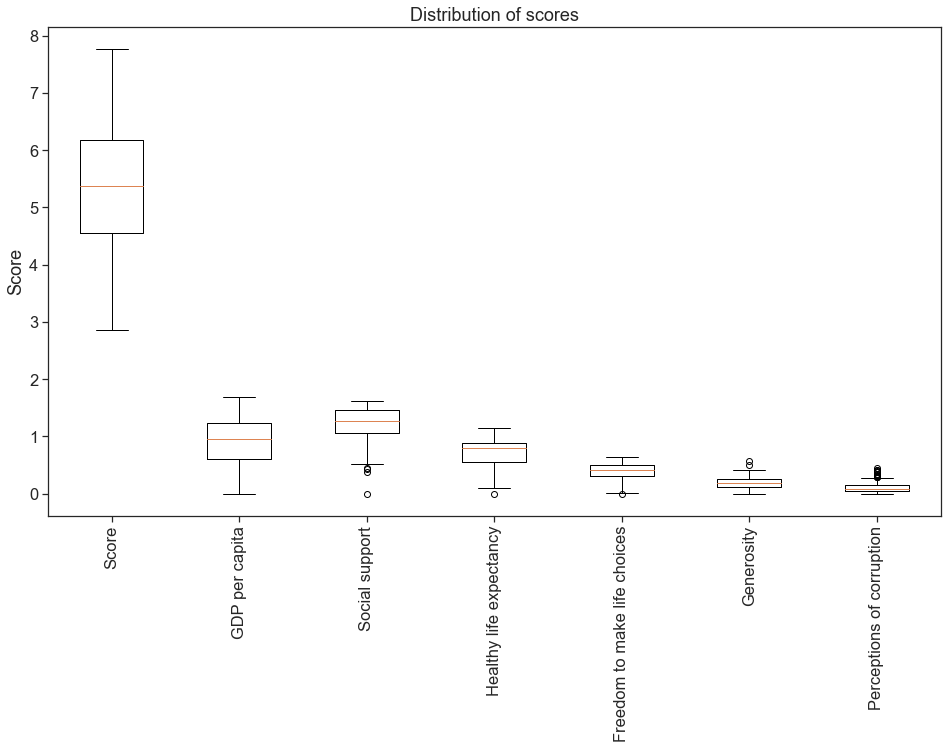

In [152]:
plt.boxplot(happiness[numerical])
plt.title("Distribution of scores")
plt.ylabel("Score")
plt.xticks([1,2,3,4,5,6,7], ['Score','GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption'], rotation = 90)
plt.show()

**Write-up!** What does the box (or violin) plot tell you about the features? Additionally, what can we say about Social Support, Generosity, and Perceptions of Corruption?

_It tells us that the features are generally pretty close together (though it appears they are on different scales, so it may not be that useful of a data viz). Social support, generosity, and perceptions of corruption all appear to have a more than one outlier data point._

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Problem 3.5

Let's look at one of those features in more detail. 

**Do this!** In the cell below, create a histogram plot with 15 bins of the feature `Perceptions of Corruption`.

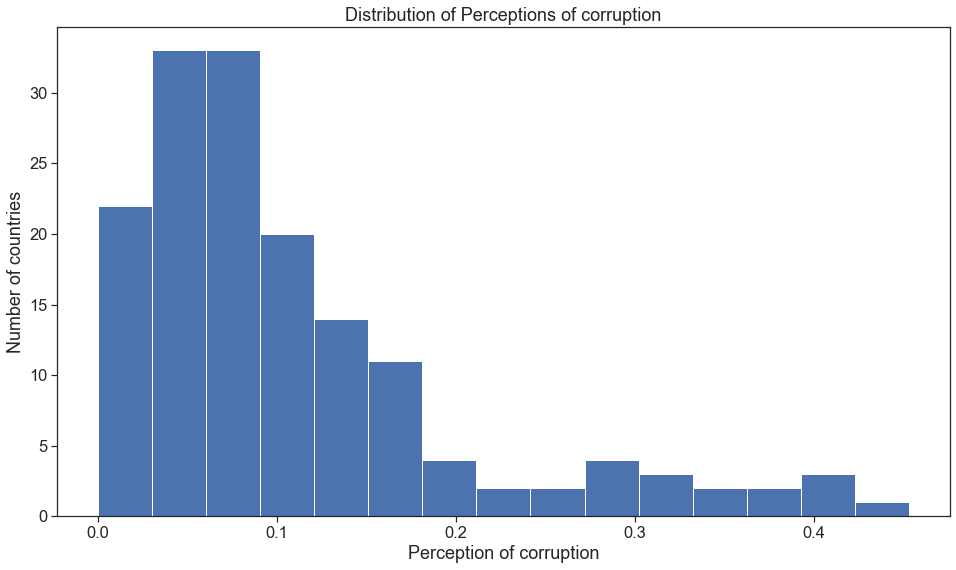

In [165]:
plt.hist(happiness['Perceptions of corruption'], bins=15)
plt.title('Distribution of Perceptions of corruption')
plt.xlabel('Perceptions of corruption')
plt.ylabel('Number of countries')
plt.show()

In [ ]:
...

**Write-up!** Describe the distribution including its _shape_ and what it means in the context of the _specific data_ it shows. 

_It is a right-skewed graph. This means that for most countries, the perception of corruption is low, but there are a small number of countries with high values._

<!-- END QUESTION -->

## 4. Comparing Pairs of Happiness Features

Now that we have a sense of what the features look like, we can start examining their relationships with each other.

<!-- BEGIN QUESTION -->

### Problem 4.1

**Do this!** Complete the function below so that it will display a scatter plot, given a data frame and two column names. (Check `Lab1` for some sample code if you need a reminder.)

In [166]:
def scatter_columns(df, first_column, second_column):
    '''
    Creates a scatter plot of two columns of a data frame.
    '''
    
    plt.scatter(df[first_column].tolist(),df[second_column].tolist())
    plt.title(first_column + ' vs ' + second_column)
    plt.xlabel(first_column)
    plt.ylabel(second_column)
    
    plt.show()
    

**Do this!** Using the function `scatter_columns` from above, explore **various combinations** of features to see which ones show some kind of trend or pattern. You must analyze more than 2 combinations! If your chosen combinations do not show much trend, you must analyze more to find one with noticeable trend!

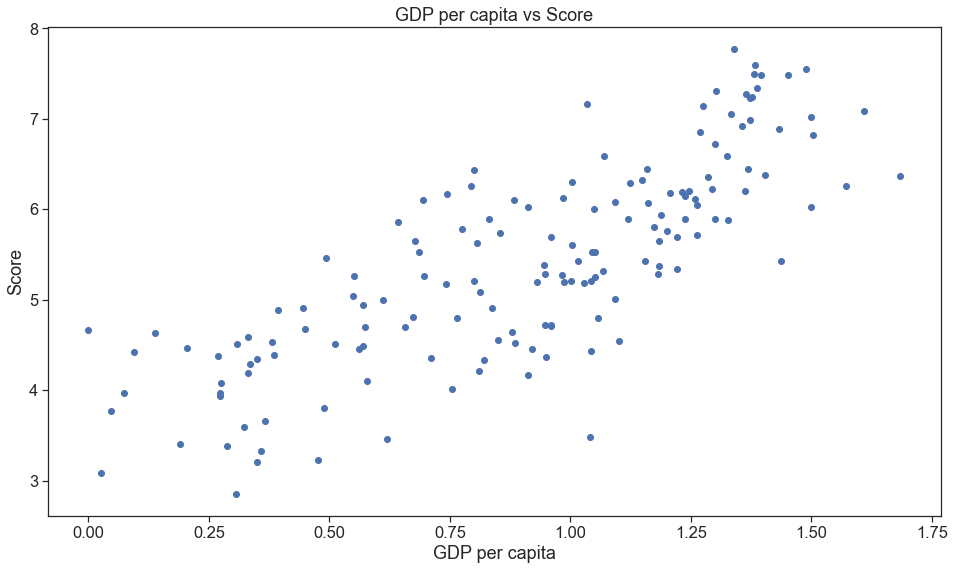

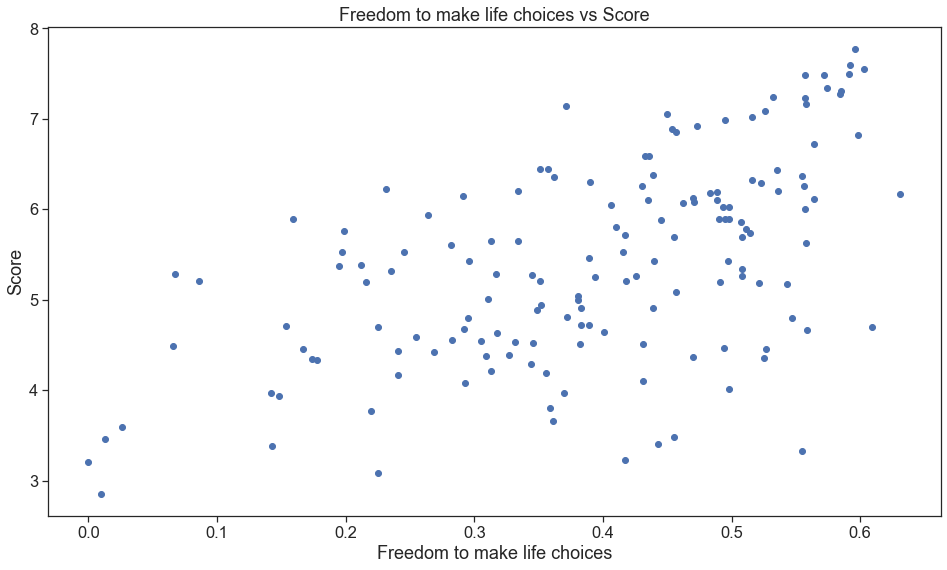

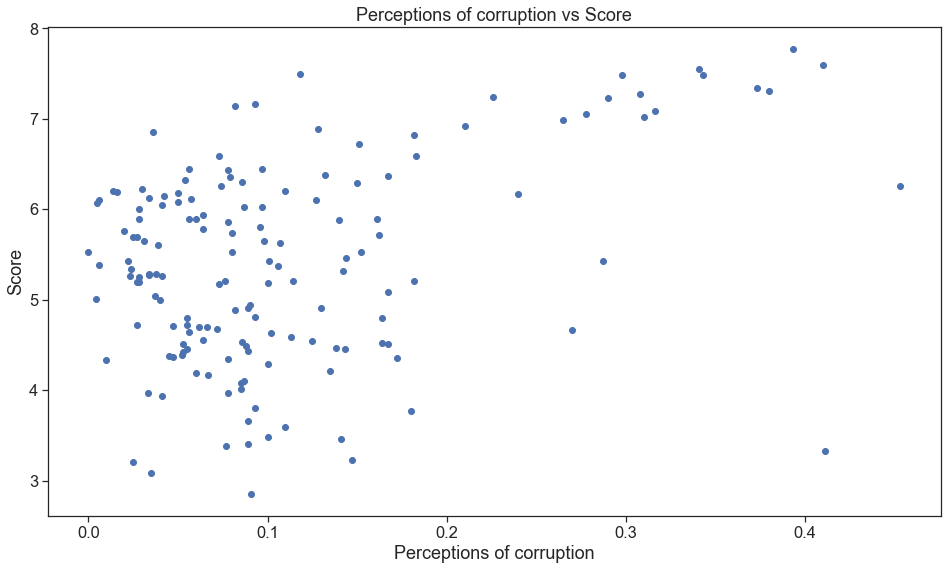

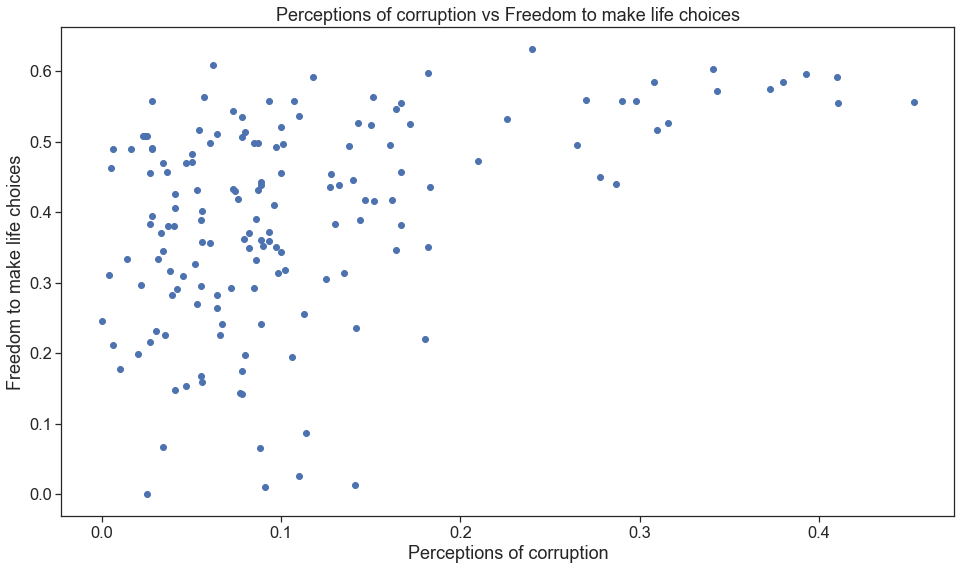

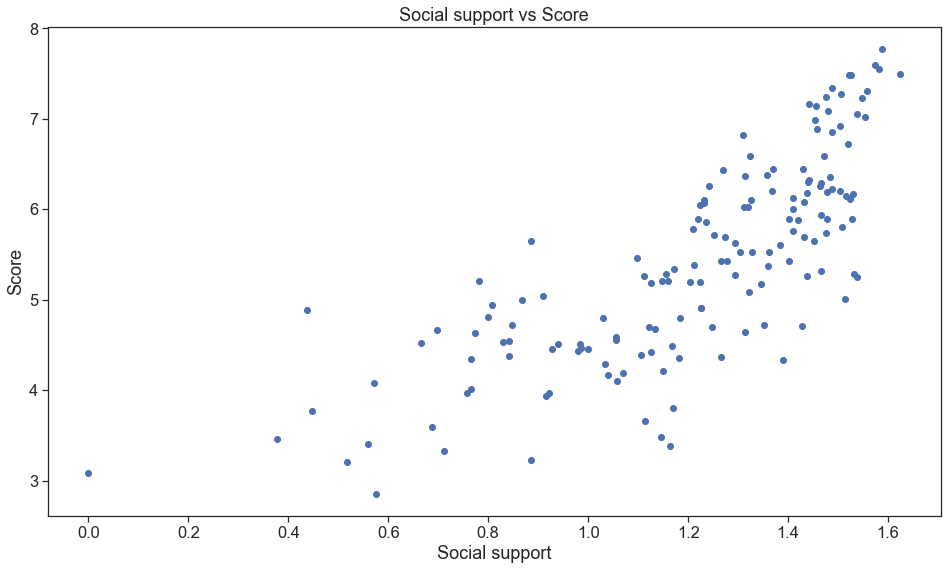

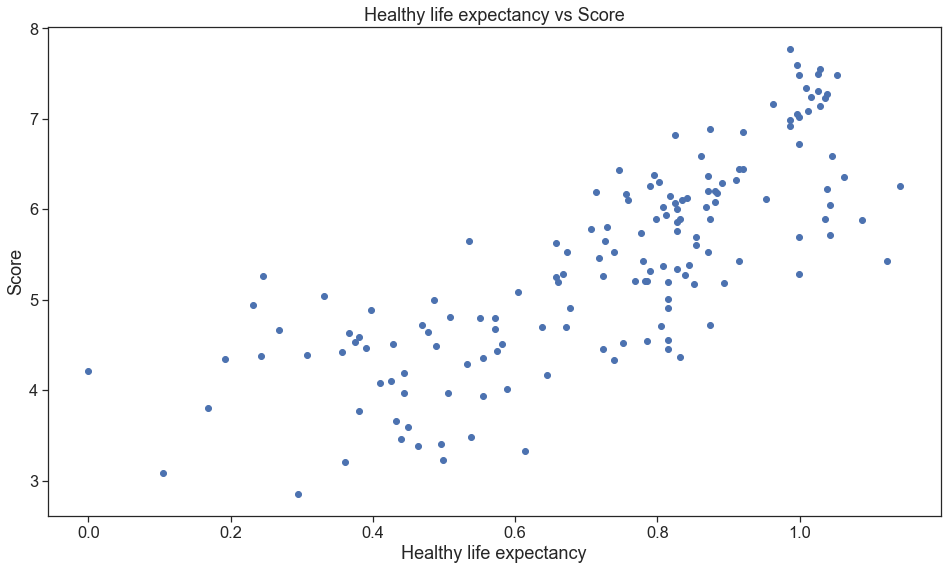

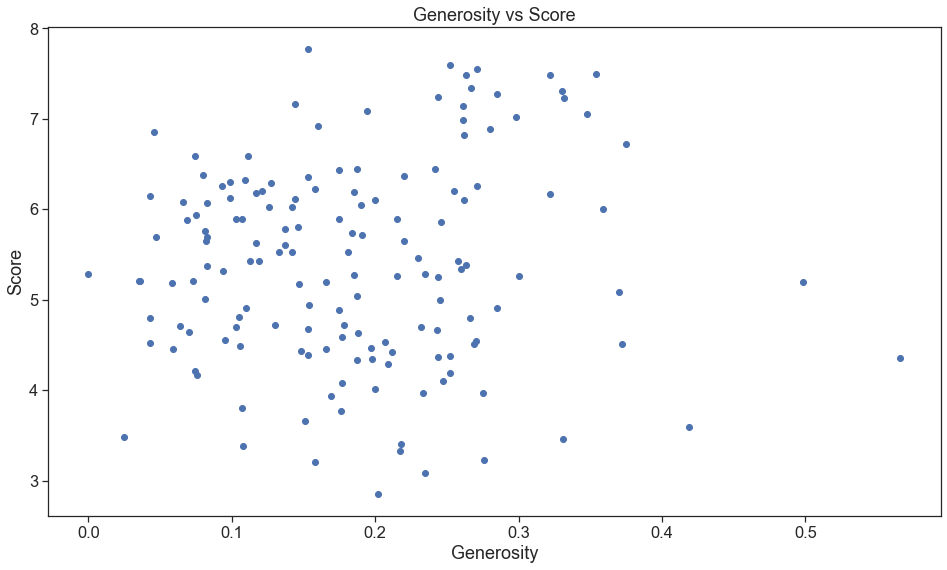

In [171]:
scatter_columns(happiness, 'GDP per capita', 'Score')
scatter_columns(happiness, 'Freedom to make life choices', 'Score')
scatter_columns(happiness, 'Perceptions of corruption', 'Score')
scatter_columns(happiness, 'Perceptions of corruption', 'Freedom to make life choices')
scatter_columns(happiness, 'Social support', 'Score')
scatter_columns(happiness, 'Healthy life expectancy', 'Score')
scatter_columns(happiness, 'Generosity', 'Score')

**Write-up!** Let's look at the pairwise feature comparison. 
* Which pairs of features show the most trend? Describe these trends. 
* Additionally, given this information, what can you conclude? 
* Was there anything that surprised you when looking at your plots? If, so what was it? 

_Although it's hard to tell by looking, I think GPD vs Score is the most correlated. I can conclude that a higher GDP leads to a higher score. I was very surpised that perceptions of corruptions vs score/freedom to make life choices appeared to have either no correlation or a positive correaltion, instead of a negative one like I was expecting._

<!-- END QUESTION -->

### Pearson Correlation

There are several ways to quantify trends, but let's pick one to discuss today. The [Pearson Correlation Coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) (commonly denoted by $\rho$ or $r$) is a frequently used statistic for quantifying linear relationships between two variables (or features in our case). It has a value of $+1$ if there is a perfect positive linear trend, a value of $-1$ if there is a perfect negative linear trend, and a value of $0$ if there is no trend.

<img src="utility/pics/correlation.png" alt="correlation" width="80%"/>

We can compute the sample correlation coefficient, $r$, with the following formula:
$$
r(X, Y) = \dfrac{\text{Cov}(X, Y)}{\sigma_X \sigma_Y} = \dfrac{\frac{1}{n-1} \sum_{i=1}^n (x_i - \mu_X)(y_i - \mu_Y)}{\sigma_X \sigma_Y},
$$
where $X$ and $Y$ are variables, $\mu$ is a mean, and $s$ is a sample standard deviation,
$$
\sigma_X = \sqrt{\dfrac{\sum_{i=1}^n (x_i - \mu_X)^2}{n-1}}.
$$

<!-- BEGIN QUESTION -->

### Problem 4.2

**Do this!** Complete the `correlation` function in the following cell so that it computes the correlation coefficient between two arrays `x` and `y`. Remember to use **vectorized operations**, but for the sake of this excercise do not use NumPy's built in functions for variance, covariance, standard deviation, or the correlation coefficient. 
> **Hint**: It may be helpful to work out the math for the equations. You can start by ["foiling"](https://en.wikipedia.org/wiki/FOIL_method) the numerator.

*Note: this question has hidden tests, or is graded on style of code and not just answer alone.*

In [189]:
def correlation(x, y):
    '''
    Returns the sample Pearson Correlation Coefficient between arrays X and Y.
    '''
    xbar = np.mean(x)
    ybar = np.mean(y)
    
    num = sum((x-xbar)*(y-ybar))
    
    den = math.sqrt(sum((x-xbar)*(x-xbar))*sum((y-ybar)*(y-ybar)))
    
    corr = (num/den)
               
    return float(corr)

correlation(happiness.Score, happiness.Generosity)

0.07582369490389647

In [179]:
grader.check("q4bii")

q4bii results: All test cases passed!

<!-- END QUESTION -->

Let's try using your implementation to compute some correlation coefficients.

**Do this!** In the cell below, compute the correlation coefficient values between `Score` and every other feature, pairwise, and store them in `corrs`. 
> **Hint**: Since this is an operation pairwise in the number of variables (which are typically considered a small number) rather than in the number of data points (which we typically consider a rather large number), it is totally ok to use `for` loop here. 

> **Hint**: Use `numerical` from [Problem 3.1](#Problem-3.1) and the `.columns` property of DataFrames to get the names of the columns that you need.

*Note: this question has hidden tests, or is graded on style of code and not just answer alone.*

In [190]:
corrs = []

for column in happiness[numerical].columns:
    corrs.append(correlation(happiness[column], happiness['Score']))

corrs

[1.0,
 0.7938828678781273,
 0.7770577880638645,
 0.779883149242583,
 0.56674182571999,
 0.07582369490389647,
 0.38561307086647856]

Let's visualize these correlation values. To do this, we will use [Seaborn's](https://seaborn.pydata.org) `heatmap` function.

In [191]:
import seaborn as sns

plt.figure(figsize=(1, 6))
sns.heatmap(corrs[:,None], cmap=sns.cm.vlag, vmin=-1)
plt.xticks([0.5], ['Score'], rotation=0)
plt.yticks(np.arange(corrs.shape[0]) + 0.5, happiness.loc[:,numerical].columns, rotation=0)
plt.title('Correlation: Score vs Rest')

TypeError: list indices must be integers or slices, not tuple

<Figure size 72x432 with 0 Axes>

As you may have seen in the test at the end of the cell before the previous cell, we can get the _Correlation Matrix_ of pairwise correlation values by using the `.corr` method on DataFrames.

In [183]:
happiness.corr()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Score,1.000000,0.793883,0.777058,0.779883,0.566742,0.075824,0.385613
GDP per capita,0.793883,1.000000,0.754906,0.835462,0.379079,-0.079662,0.298920
Social support,0.777058,0.754906,1.000000,0.719009,0.447333,-0.048126,0.181899
Healthy life expectancy,0.779883,0.835462,0.719009,1.000000,0.390395,-0.029511,0.295283
Freedom to make life choices,0.566742,0.379079,0.447333,0.390395,1.000000,0.269742,0.438843
Generosity,0.075824,-0.079662,-0.048126,-0.029511,0.269742,1.000000,0.326538
Perceptions of corruption,0.385613,0.298920,0.181899,0.295283,0.438843,0.326538,1.000000


Text(0.5, 1.0, 'Happiness: Correlation Matrix')

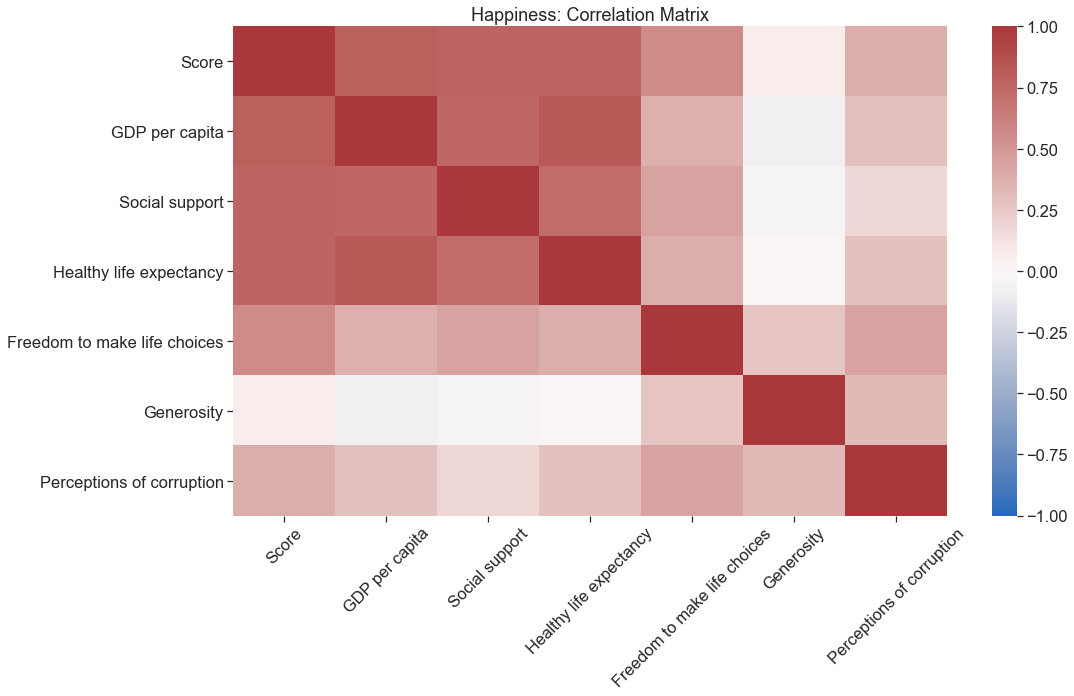

In [184]:
sns.heatmap(happiness.corr(), cmap=sns.cm.vlag, vmin=-1)
plt.xticks(rotation=45)
plt.title('Happiness: Correlation Matrix')

<!-- BEGIN QUESTION -->

**Write-up!** Answer the following summary questions: 
* Which features (apart form `Score` itself) have the **highest** correlation with happiness? 
* Which have the **lowest**? 
* Are there **negative correlations**?
* Do you think these results are surprising? Briefly justify why/why not?

_GPD, social support, and healthy life expectancy have the highest correlations with happiness. Generosity is by far the lowest. There are no negative correlations. It is surpising to me that perceptions of corruption is not only not negatively correlated, but actually has a stronger postive correlation than generosity._

<!-- END QUESTION -->



---

To double-check your work, the cell below will rerun all of the autograder tests.

In [192]:
grader.check_all()

q1b results: All test cases passed!

q1f results: All test cases passed!

q3a results: All test cases passed!

q3ciii results: All test cases passed!

q4bii results: All test cases passed!

q4biii results: All test cases passed!

qcii results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [194]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)